In [1]:
import data_processing as dp
import importlib
importlib.reload(dp)
import model_evaluation as me
import pandas as pd
import torch

from models.mlp import MLP

In [2]:
####################
# LOADING THE DATA #
####################
DATA_DIR = "../segmented_data/"
SUBJECTS = ['AT'] #, 'EL', 'HH', 'MS', 'RB', 'RL', 'TT']
SCENES = ['FlatWalkStraight', 'FlatWalkCircular', 'FlatWalkStatic']
TRIALS = ('all')

gait_cycles = dp.read_gait_cycles(DATA_DIR, SUBJECTS, SCENES, TRIALS, drop_emgs=True)

Reading all trials of ['AT'].


In [3]:
##########################
# FILTER THE GAIT CYCLES #
##########################
df_l, df_r = dp.filter_seperately(gait_cycles)

In [4]:
##############################################
# LEFT VS. RIGHT FOOT -> MAIN VS. OTHER FOOT #
##############################################
df_l, df_r = dp.homogenize(df_l, df_r)
df_homogenous = pd.concat([df_l, df_r])

In [5]:
############################
# FEATURE/LABEL EXTRACTION #
############################
# Features
X = dp.extract_features(df_homogenous)

# Labels
Y = df_homogenous[['Fx', 'Fy', 'Fz', 'Tz']]

# Strata
strata = df_homogenous['trial']

In [6]:
######################
# CONVERT TO TENSORS #
######################
X_tensor = torch.tensor(X.values, dtype=torch.float32)
Y_tensor = torch.tensor(Y.to_numpy().reshape((-1, 4)), dtype=torch.float32)

In [7]:
from sklearn.model_selection import train_test_split

####################
# TRAIN-TEST SPLIT #
####################
# Make the same stratified split for X, Y and strata
(X_full_train,      X_test, 
 Y_full_train,      Y_test, 
 strata_full_train, strata_test) = train_test_split(X_tensor, Y_tensor, strata, test_size=0.2, random_state=42, stratify=strata)

In [8]:
###############
# PERFORM PCA #
###############
X_pc_full_train, X_pc_test = dp.perform_pca(X_full_train, X_test)

Performance on the test set:
NRMSE = 0.0638
r = 0.9177199526360847


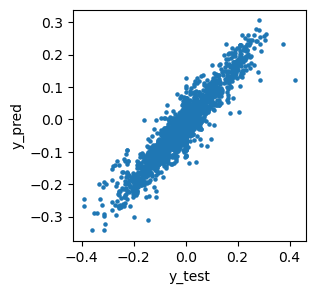

In [9]:
################
# Fx REGRESSOR #
################
Fx_regressor = MLP([42])
Fx_regressor.train_(X_pc_full_train, Y_full_train[:, 0].reshape(-1, 1))

# Evaluate the model
Fx_regressor.eval()
Fx_pred = Fx_regressor(X_pc_test)
me.print_metrics(Y_test[:, 0].reshape(-1, 1), Fx_pred)

Performance on the test set:
NRMSE = 0.0535
r = 0.9450975150974628


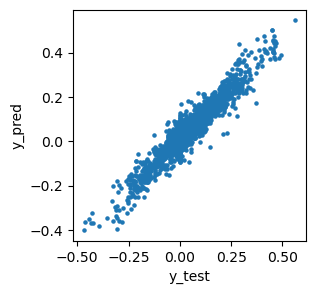

In [10]:
################
# Fy REGRESSOR #
################
Fy_regressor = MLP([42])
Fy_regressor.train_(X_pc_full_train, Y_full_train[:, 1].reshape(-1, 1))

# Evaluate the model
Fy_regressor.eval()
Fy_pred = Fy_regressor(X_pc_test)
me.print_metrics(Y_test[:, 1].reshape(-1, 1), Fy_pred)

Performance on the test set:
NRMSE = 0.0303
r = 0.9921899591653358


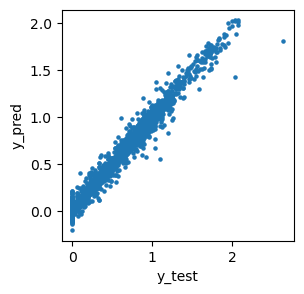

In [11]:
################
# Fz REGRESSOR #
################
Fz_regressor = MLP([42])
Fz_regressor.train_(X_pc_full_train, Y_full_train[:, 2].reshape(-1, 1))

# Evaluate the model
Fz_regressor.eval()
Fz_pred = Fz_regressor(X_pc_test)
me.print_metrics(Y_test[:, 2].reshape(-1, 1), Fz_pred)

Performance on the test set:
NRMSE = 0.1084
r = 0.7068471734088378


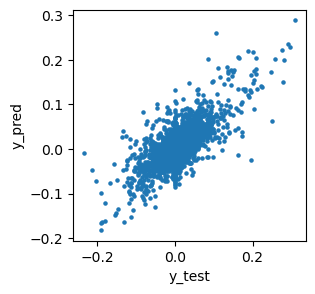

In [12]:
################
# Tz REGRESSOR #
################
Tz_regressor = MLP([42])
Tz_regressor.train_(X_pc_full_train, Y_full_train[:, 3].reshape(-1, 1))

# Evaluate the model
Tz_regressor.eval()
Tz_pred = Tz_regressor(X_pc_test)
me.print_metrics(Y_test[:, 3].reshape(-1, 1), Tz_pred)